In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn import metrics as mt
from sklearn.metrics import roc_curve, auc
import operator
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KDTree
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

In [2]:
directory = 'C:/githubrepo/7331_Project/data/'
df_zg = pd.read_csv(directory + 'Diabetic_Cleaned.csv')
print("Done reading data.")

Done reading data.


In [7]:
ordinal = ["age", "time_in_hospital"]
categorical = ["race", "gender", "admission_type_id", "discharge_disposition_id",
               "admission_source_id", "medical_specialty", "max_glu_serum",
               "A1Cresult", "change", "diabetesMed", "diag_1_val", "diag_2_val",
               "diag_3_val", "meds_increased"]
continuous = ["num_lab_procedures", "num_procedures", "num_medications",
              "number_outpatient", "number_emergency", "number_inpatient",
              "number_diagnoses", "medication_count"]
lcontinuous = ["lnum_lab_procedures", "lnum_procedures", "lnum_medications",
              "lnumber_outpatient", "lnumber_emergency", "lnumber_inpatient",
              "lnumber_diagnoses", "lmedication_count"]
medicines = ["metformin", "repaglinide", "nateglinide", "chlorpropamide",
             "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide",
             "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone",
             "tolazamide", "insulin", "glyburide-metformin", "glipizide-metformin",
             "metformin-rosiglitazone", "metformin-pioglitazone"]
response = ["readmitted_tf"]

In [8]:
df_zg_ordinal = df_zg[ordinal]
df_zg_categorical = df_zg[categorical]
df_zg_continuous = df_zg[continuous]
df_zg_lcontinuous = np.log(df_zg_continuous)
df_zg_lcontinuous.columns = lcontinuous
df_zg_medicines = df_zg[medicines]
df_zg_response = df_zg[response]

In [9]:
#Make age ordinal
for i in range(0, 10):
    val = "[" + str(i*10) + "-" + str((i+1)*10) + ")"
    df_zg_ordinal.loc[df_zg_ordinal['age'] == val, 'age'] = i

#Gender: 1 = Female, 0 = Male
df_zg_categorical.gender[df_zg_categorical.gender == 'Male'] = 0
df_zg_categorical.gender[df_zg_categorical.gender == 'Female'] = 1
df_zg_categorical["gender"] = df_zg_categorical["gender"].astype(int)

In [10]:
df_zg_categorical['admission_type_id'] = df_zg_categorical['admission_type_id'].astype(object)
df_zg_categorical['discharge_disposition_id'] = df_zg_categorical['discharge_disposition_id'].astype(object)
df_zg_categorical['admission_source_id'] = df_zg_categorical['admission_source_id'].astype(object)
df_zg_categorical['admission_type_id'] = df_zg_categorical['admission_type_id'].astype(object)
df_zg_categorical['meds_increased'] = df_zg_categorical['meds_increased'].astype(object)
#df_zg_response['readmitted_tf'] = df_zg_response['readmitted_tf'].astype(object)
print("Done")

Done


In [12]:
df_zg_x = pd.concat([df_zg_ordinal, df_zg_categorical, df_zg_continuous], axis = 1)
df_zg_num_x = pd.concat([df_zg_ordinal, df_zg_continuous], axis = 1)
df_zg_med_x = pd.concat([df_zg_ordinal, df_zg_categorical, df_zg_continuous, df_zg_medicines], axis = 1)
df_zg_hot_x = pd.concat([df_zg_ordinal, pd.get_dummies(df_zg_categorical), df_zg_continuous], axis = 1)
df_zg_hot_med_x = pd.concat([df_zg_ordinal, pd.get_dummies(df_zg_categorical), df_zg_continuous, pd.get_dummies(df_zg_medicines)], axis = 1)
df_zg_y = df_zg_response
print("Done")

Done


## K-Means Test - Weighted

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df_zg_hot_x, df_zg_y, test_size = 0.4, random_state = 7)

#Print out the shapes of the train/valid/test sets
x_train.shape, x_test.shape

((61059, 183), (40707, 183))

In [19]:
from sklearn.utils.class_weight import compute_sample_weight

#### 1 - 11 clusters

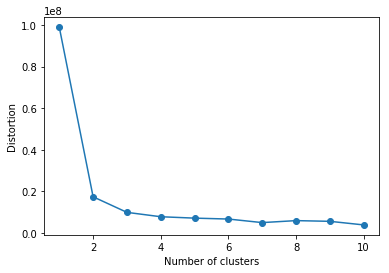

Wall time: 24.6 s


In [27]:
%%time
# calculate distortion for a range of number of cluster
distortions = []
size = 11
weight = compute_sample_weight(class_weight='balanced', y=x_train)
for i in range(1, size):
    kmeans = KMeans(
        n_clusters = i, init = 'random',
        n_init = 10, n_jobs = -1)
    kmeans.fit(x_train, sample_weight = weight)
    distortions.append(kmeans.inertia_)

# plot
plt.plot(range(1, size), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#### Mini-batch 1 - 11 clusters

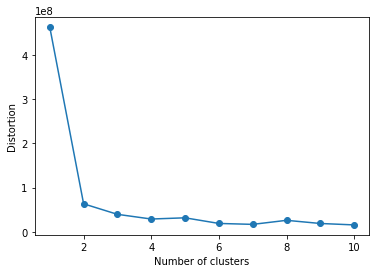

Wall time: 14.7 s


In [28]:
%%time
# calculate distortion for a range of number of cluster
distortions = []
size = 11
weight = compute_sample_weight(class_weight='balanced', y=x_train)
for i in range(1, size):
    kmeans = MiniBatchKMeans(n_clusters = i, batch_size = 10)
    kmeans.fit(x_train, sample_weight = weight)
    distortions.append(kmeans.inertia_)

# plot
plt.plot(range(1, size), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Without weighting

In [23]:
x_train, x_test, y_train, y_test = train_test_split(df_zg_hot_x, df_zg_y, test_size = 0.4, random_state = 7)

#Print out the shapes of the train/valid/test sets
x_train.shape, x_test.shape

((61059, 184), (40707, 184))

#### 1-11

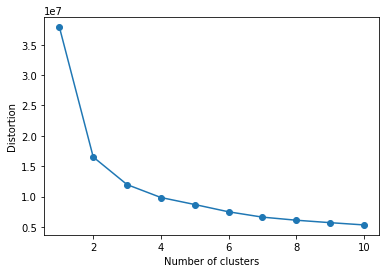

Wall time: 1min 1s


In [24]:
%%time
# calculate distortion for a range of number of cluster
distortions = []
size = 11
for i in range(1, le):
    kmeans = KMeans(
        n_clusters = i, init = 'random',
        n_init = 10, n_jobs = -1)
    kmeans.fit(x_train)
    distortions.append(kmeans.inertia_)

# plot
plt.plot(range(1, size), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

#### Mini-batch 1-11

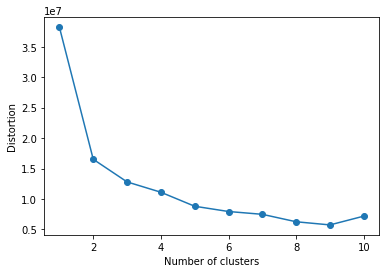

Wall time: 13.3 s


In [25]:
%%time
# calculate distortion for a range of number of cluster
distortions = []
size = 11
for i in range(1, le):
    kmeans = MiniBatchKMeans(n_clusters = i, batch_size = 10)
    kmeans.fit(x_train)
    distortions.append(kmeans.inertia_)

# plot
plt.plot(range(1, size), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()